# Motif extraction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
from katlas.core import *
from katlas.plot import *
from tqdm import tqdm
from pathlib import Path
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [ ]:
df=pd.read_parquet('raw/combine_source_grouped.parquet')

In [ ]:
cluster_map=pd.read_parquet('raw/kmeans_site_long_new_cluster.parquet')

In [ ]:
cluster_map = cluster_map[['sub_site','cluster_new']].drop_duplicates()

In [ ]:
cluster_map = cluster_map[cluster_map.sub_site.isin(df.sub_site.unique())].reset_index(drop=True)

In [ ]:
df = df.merge(cluster_map,on='sub_site',how='outer')

In [ ]:
df.to_parquet('raw/combine_source_grouped_cluster.parquet',index=False)

Note that the df above is in long form, with duplicates in sub_site due to cluster overlap

In [ ]:
df

kin_sub_site kinase_uniprot substrate_uniprot  site  \
0       P48730_A0A2R8Y4L2_S158         P48730        A0A2R8Y4L2  S158   
1       P48730_A0A2R8Y4L2_S158         P48730        A0A2R8Y4L2  S158   
2       P48730_A0A2R8Y4L2_S158         P48730        A0A2R8Y4L2  S158   
3       P48730_A0A2R8Y4L2_S158         P48730        A0A2R8Y4L2  S158   
4       P48730_A0A2R8Y4L2_S158         P48730        A0A2R8Y4L2  S158   
...                        ...            ...               ...   ...   
813555      P52333_Q9Y6Y8_Y935         P52333            Q9Y6Y8  Y935   
813556      P07948_Q9Y6Y9_Y131         P07948            Q9Y6Y9  Y131   
813557      P07948_Q9Y6Y9_Y131         P07948            Q9Y6Y9  Y131   
813558       P07948_Q9Y6Y9_Y22         P07948            Q9Y6Y9   Y22   
813559       P07948_Q9Y6Y9_Y22         P07948            Q9Y6Y9   Y22   

          source       substrate_genes  \
0       Sugiyama  HNRNPA1L3 HNRNPA1P48   
1       Sugiyama  HNRNPA1L3 HNRNPA1P48   
2       Sugiyama  HNRNPA1L3 HNRNPA1P48   
3       Sugiyama  HNRNPA1L3 HNRNPA1P48   
4       Sugiyama  HNRNPA1L3 HNRNPA1P48   
...          ...                   ...   
813555  Sugiyama       SEC23IP MSTP053   
813556  EPSD|PSP        LY96 ESOP1 MD2   
813557  EPSD|PSP        LY96 ESOP1 MD2   
813558  EPSD|PSP        LY96 ESOP1 MD2   
813559  EPSD|PSP        LY96 ESOP1 MD2   

                                       substrate_sequence  \
0       MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...   
1       MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...   
2       MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...   
3       MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...   
4       MSKSESPKEPEQLRKLFIGGLSFETTDESLRSHFEQWGTLTDCVVM...   
...                                                   ...   
813555  MAERKPNGGSGGASTSSSGTNLLFSSSATEFSFNVPFIPVTQASAS...   
813556  MLPFLFFSTLFSSIFTEAQKQYWVCNSSDASISYTYCDKMQYPISI...   
813557  MLPFLFFSTLFSSIFTEAQKQYWVCNSSDASISYTYCDKMQYPISI...   
813558  MLPFLFFSTLFSSIFTEAQKQYWVCNSSDASISYTYCDKMQYPISI...   
813559  MLPFLFFSTLFSSIFTEAQKQYWVCNSSDASISYTYCDKMQYPISI...   

                                     substrate_phosphoseq  position  \
0       MSKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVVM...       158   
1       MSKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVVM...       158   
2       MSKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVVM...       158   
3       MSKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVVM...       158   
4       MSKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVVM...       158   
...                                                   ...       ...   
813555  MAERKPNGGSGGASTSSSGTNLLFSSSATEFSFNVPFIPVTQASAS...       935   
813556  MLPFLFFSTLFSSIFTEAQKQyWVCNSSDASISYTYCDKMQYPISI...       131   
813557  MLPFLFFSTLFSSIFTEAQKQyWVCNSSDASISYTYCDKMQYPISI...       131   
813558  MLPFLFFSTLFSSIFTEAQKQyWVCNSSDASISYTYCDKMQYPISI...        22   
813559  MLPFLFFSTLFSSIFTEAQKQyWVCNSSDASISYTYCDKMQYPISI...        22   

                                         site_seq         sub_site  \
0       TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR  A0A2R8Y4L2_S158   
1       TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR  A0A2R8Y4L2_S158   
2       TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR  A0A2R8Y4L2_S158   
3       TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR  A0A2R8Y4L2_S158   
4       TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR  A0A2R8Y4L2_S158   
...                                           ...              ...   
813555  KQVVEAEKVVEsPDFsKDEDyLGKVGMLNGGRRIDYVLQEK      Q9Y6Y8_Y935   
813556  ETVNTTISFSFKGIKFSKGKyKCVVEAISGSPEEMLFCLEF      Q9Y6Y9_Y131   
813557  ETVNTTISFSFKGIKFSKGKyKCVVEAISGSPEEMLFCLEF      Q9Y6Y9_Y131   
813558  LPFLFFSTLFSSIFTEAQKQyWVCNSSDASISYTYCDKMQY       Q9Y6Y9_Y22   
813559  LPFLFFSTLFSSIFTEAQKQyWVCNSSDASISYTYCDKMQY       Q9Y6Y9_Y22   

        cluster_new  
0               391  
1               634  
2               392  
3               542  
4               388  
...             ...  
813555          672  
813556          676  
813557     

## Motifs

In [ ]:
df.drop_duplicates('sub_site')

TypeError: drop_duplicates() got an unexpected keyword argument 'subset'

In [ ]:
def extract_motifs2(df, cluster_col, subcluster_col=None, seq_col='site_seq',count_thr=10, valid_thr=None,plot=False):
    "Extract motifs from clusters in a dataframe"
    pssms = []
    ids = []
    value_counts = df[cluster_col].value_counts()
    for cluster_id, counts in tqdm(value_counts.items(),total=len(value_counts)):
        if count_thr is not None and counts <= count_thr:
            continue

        # Modify this line 
        # df_cluster = df[df[cluster_col] == cluster_id]
        df_cluster = df[df[cluster_col] == cluster_id].drop_duplicates('sub_site')
        n= len(df_cluster)
        pssm = get_prob(df_cluster, seq_col)
        valid_score = (pssm != 0).sum().sum() / (pssm.shape[0] * pssm.shape[1])

        if valid_thr is not None and valid_score <= valid_thr:
            continue

        pssms.append(flatten_pssm(pssm))
        ids.append(cluster_id)

        if plot:
            plot_logo(pssm, title=f'{cluster_id} (n={n})', figsize=(14, 1))
            plt.show()
            plt.close()
            if subcluster_col is not None:
                subcluster_counts = df_cluster[subcluster_col].value_counts()
                print(subcluster_counts)
                for idx, counts in subcluster_counts.items():
                    i=0
                    if count_thr is not None and counts <= count_thr:
                        continue
                    df_subcluster= df_cluster[df_cluster[subcluster_col] == idx].drop_duplicates('sub_site')
                    pssm_sub = get_prob(df_subcluster, seq_col)
                    valid_score_sub = (pssm_sub != 0).sum().sum() / (pssm_sub.shape[0] * pssm_sub.shape[1])

                    if valid_thr is not None and valid_score_sub <= valid_thr:
                        continue
                    n_sub = len(df_subcluster)
                    plot_logo(pssm_sub, title=f'Cluster {idx} (n={n_sub})', figsize=(14, 1))
                    plt.show()
                    plt.close()
                    i += 1
                    if i== 3:
                        break

    pssm_df = pd.DataFrame(pssms, index=ids)
    return pssm_df

In [ ]:
_ = extract_motifs2(df,'kinase_uniprot',subcluster_col='cluster_new',count_thr=10,valid_thr=0.5,plot=True)

  0%|          | 0/747 [00:00<?, ?it/s]

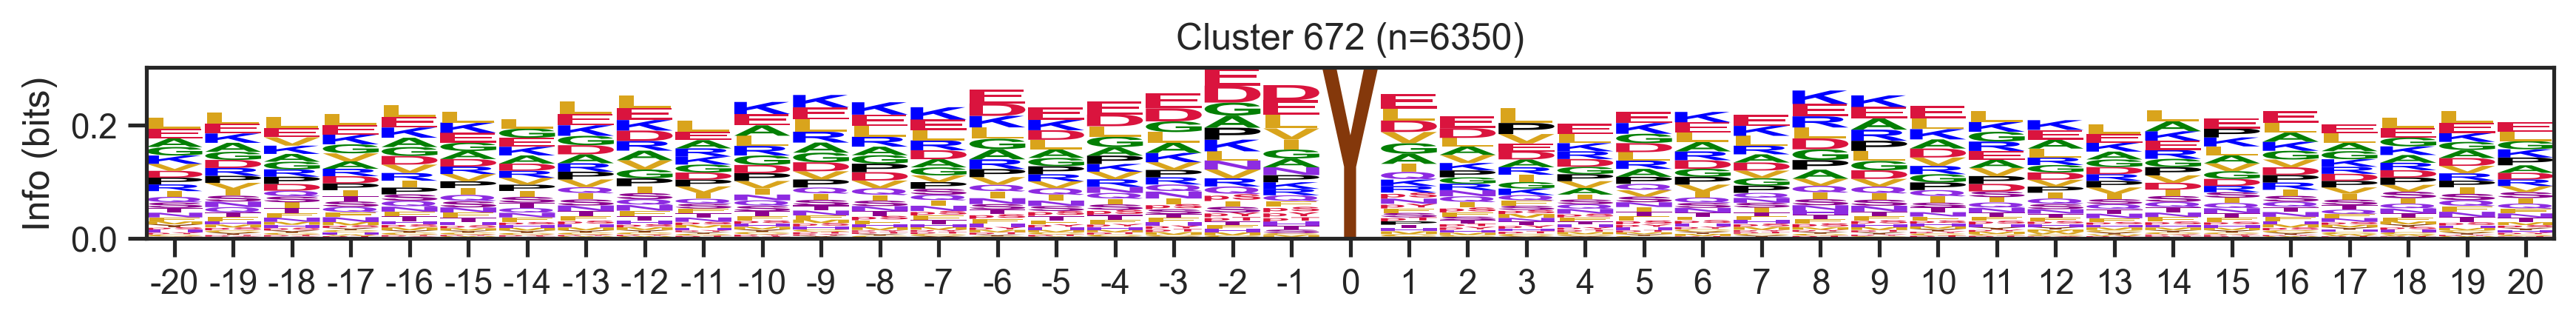

  0%|          | 1/747 [00:09<1:57:48,  9.48s/it]


KeyboardInterrupt: 

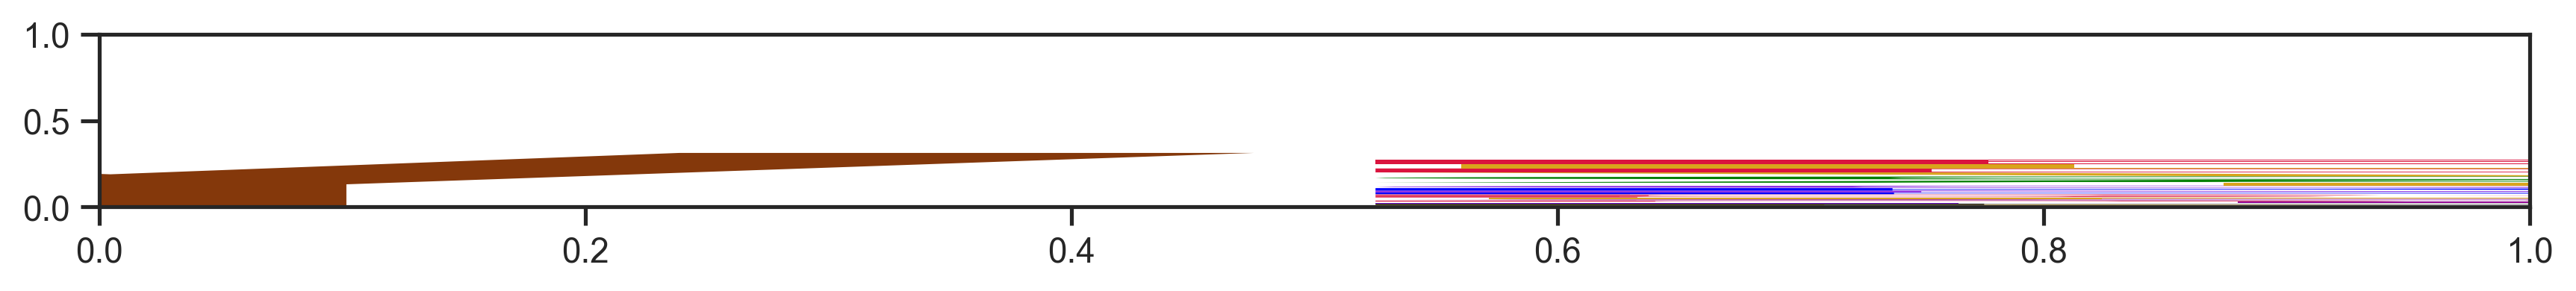

In [ ]:
_ = extract_motifs2(df,'cluster_new','site_seq',count_thr=10,valid_thr=0.3,plot=True)

## Extract sequence

In [ ]:
df['position']=df['site'].str[1:].astype(int)

In [ ]:
df['site_seq'] = extract_site_seq(df,
                                  seq_col='substrate_phosphoseq',
                                  position_col='position',
                                  length=20)

100%|██████████| 187066/187066 [00:06<00:00, 29995.39it/s]


In [ ]:
df_k = df[df.kinase_uniprot=='P49841'] 

In [ ]:
len(df_k)

691

In [ ]:
pssm = get_prob(df_k,'site_seq')

In [ ]:
pssm.head()

Position       -20       -19       -18       -17       -16       -15  \
aa                                                                     
P         0.069940  0.077381  0.062407  0.084695  0.082840  0.072378   
G         0.087798  0.087798  0.069837  0.065379  0.076923  0.054653   
A         0.101190  0.095238  0.071322  0.075780  0.073964  0.103397   
C         0.022321  0.007440  0.011887  0.014859  0.010355  0.008863   
S         0.090774  0.071429  0.086181  0.054978  0.079882  0.064993   

Position       -14       -13       -12       -11       -10       -9   \
aa                                                                     
P         0.087149  0.081121  0.077827  0.071848  0.101025  0.074671   
G         0.088626  0.095870  0.064611  0.068915  0.070278  0.087848   
A         0.073855  0.063422  0.076358  0.085044  0.073206  0.068814   
C         0.007386  0.014749  0.019090  0.008798  0.010249  0.011713   
S         0.085672  0.063422  0.082232  0.071848  0.077599  0.073206   

Position       -8        -7        -6        -5        -4        -3   \
aa                                                                     
P         0.084672  0.106414  0.112082  0.094340  0.079826  0.133333   
G         0.058394  0.065598  0.066958  0.063861  0.068215  0.101449   
A         0.084672  0.080175  0.064047  0.065312  0.047896  0.069565   
C         0.018978  0.014577  0.020378  0.011611  0.007257  0.005797   
S         0.083212  0.069971  0.071325  0.091437  0.074020  0.039130   

Position       -2        -1    0         1         2         3         4   \
aa                                                                          
P         0.150507  0.131693  0.0  0.420290  0.141194  0.094891  0.049708   
G         0.076700  0.105644  0.0  0.075362  0.065502  0.086131  0.046784   
A         0.085384  0.073806  0.0  0.039130  0.101892  0.061314  0.062865   
C         0.024602  0.014472  0.0  0.007246  0.030568  0.027737  0.004386   
S         0.062229  0.078148  0.0  0.027536  0.062591  0.103650  0.090643   

Position        5         6         7         8         9         10  \
aa                                                                     
P         0.187408  0.082111  0.077266  0.064662  0.106928  0.074242   
G         0.054173  0.060117  0.083210  0.084211  0.058735  0.063636   
A         0.074671  0.099707  0.078752  0.066165  0.060241  0.083333   
C         0.005857  0.024927  0.011887  0.012030  0.015060  0.010606   
S         0.057101  0.087977  0.098068  0.093233  0.057229  0.095455   

Position        11        12        13        14        15        16  \
aa                                                                     
P         0.077863  0.078462  0.070878  0.095164  0.092476  0.074132   
G         0.083969  0.084615  0.075501  0.076443  0.081505  0.067823   
A         0.044275  0.067692  0.078582  0.068643  0.068966  0.085174   
C         0.015267  0.023077  0.013867  0.018721  0.014107  0.009464   
S         0.083969  0.078462  0.070878  0.070203  0.070533  0.078864   

Position        17        18        19        20  
aa                                                
P         0.090190  0.071542  0.099359  0.078905  
G         0.060127  0.077901  0.088141  0.066023  
A         0.090190  0.073132  0.054487  0.077295  
C         0.011076  0.033386  0.004808  0.008052  
S         0.060127  0.085851  0.086538  0.095008

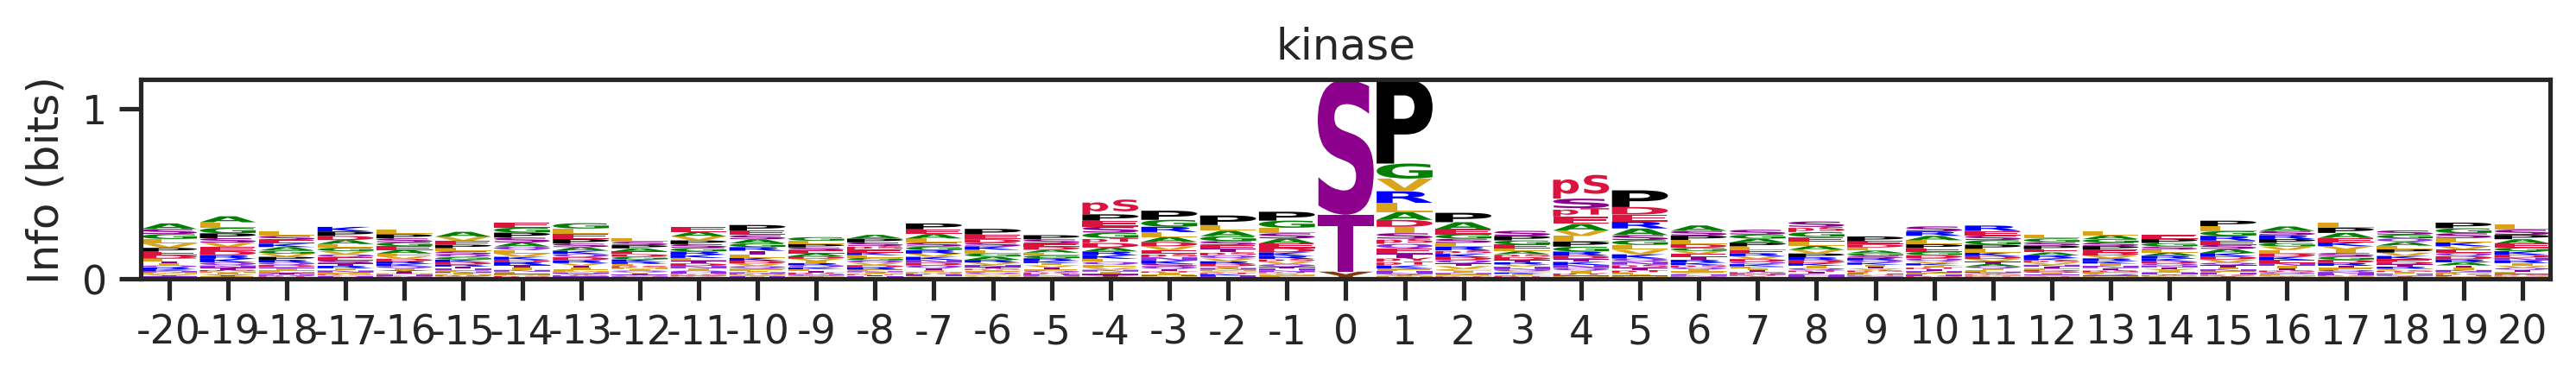

In [ ]:
plot_logo(pssm,'kinase',figsize=(12,1))

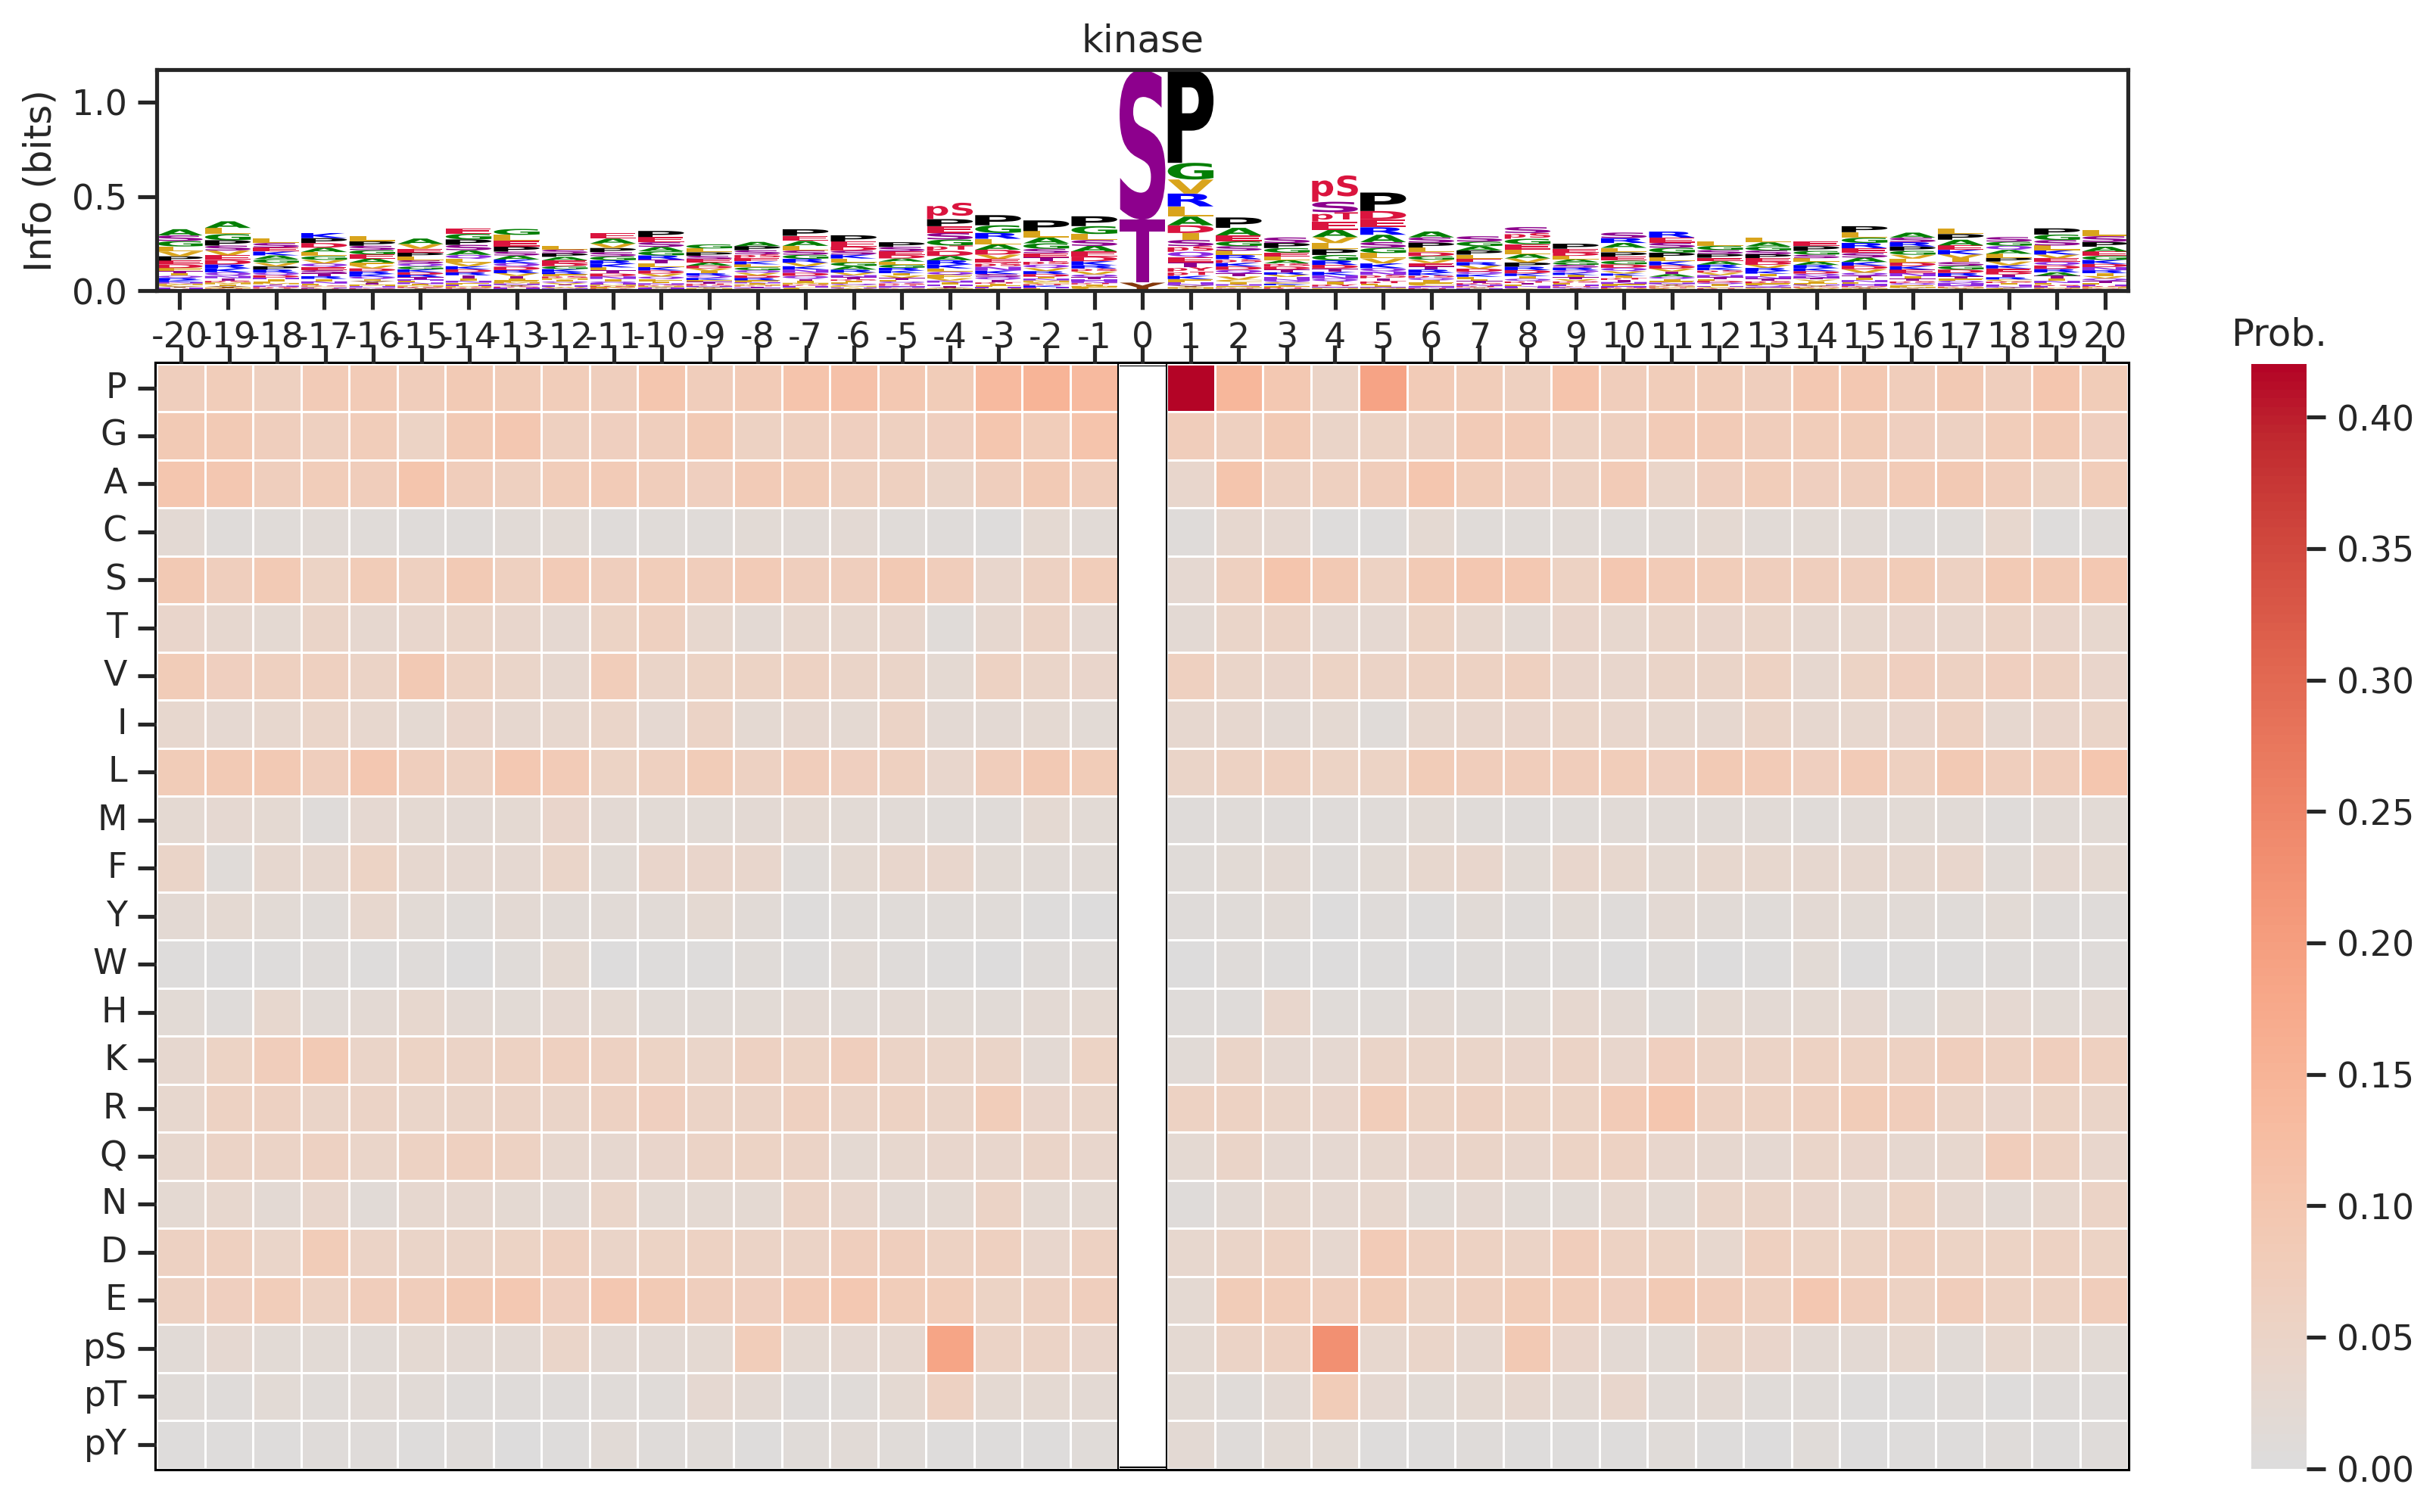

In [ ]:
plot_logo_heatmap(pssm,'kinase',figsize=(14,8))

## Kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
onehot = onehot_encode(df['site_seq'])

In [ ]:
df_k=df[df.kinase_uniprot=='P00519'].copy()
onehot_k = onehot[df.kinase_uniprot=='P00519'].copy()

In [ ]:
def determine_clusters_elbow(encoded_data, max_clusters=40):
            
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(encoded_data)
        wcss.append(kmeans.inertia_)
    
    # Plot the Elbow graph
    plt.figure(figsize=(5, 3))
    plt.plot(range(1, max_clusters + 1), wcss)
    plt.title(f'Elbow Method (n={len(encoded_data)})')
    plt.xlabel('# Clusters')
    plt.ylabel('WCSS')

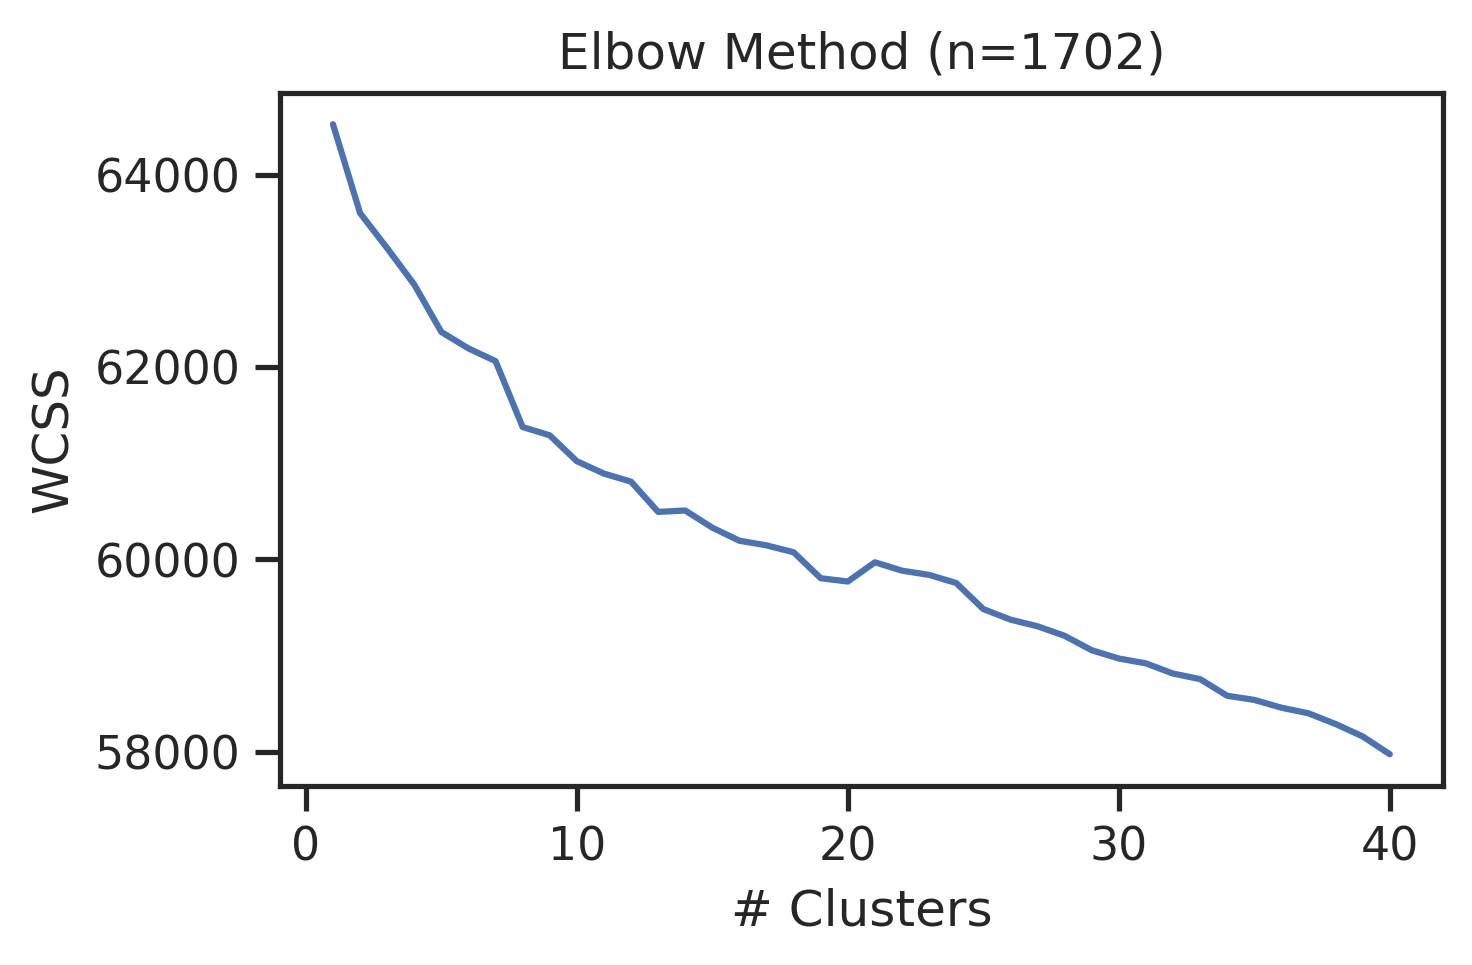

In [ ]:
determine_clusters_elbow(onehot_k)

## Overall cluster

In [ ]:
len(df.kinase_uniprot.unique())

455

In [ ]:
kmeans = KMeans(n_clusters=200, random_state=42)
cluster_labels = kmeans.fit_predict(onehot)
df['kmeans_overall'] = cluster_labels

In [ ]:
df_k=df[df.kinase_uniprot=='P31749'].copy()
onehot_k = onehot[df.kinase_uniprot=='P31749'].copy()

In [ ]:
df_k.kmeans_overall.value_counts()

kmeans_overall
8      252
171    126
7       48
59      27
87      18
      ... 
142      1
61       1
28       1
176      1
89       1
Name: count, Length: 68, dtype: int64

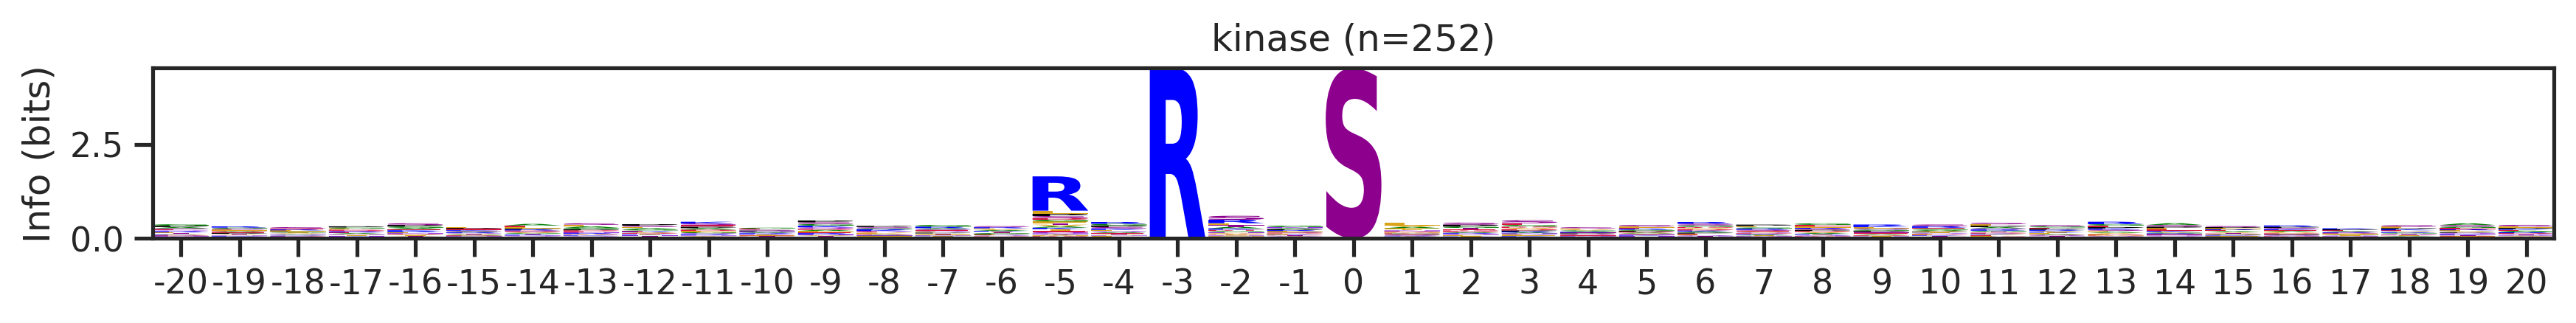

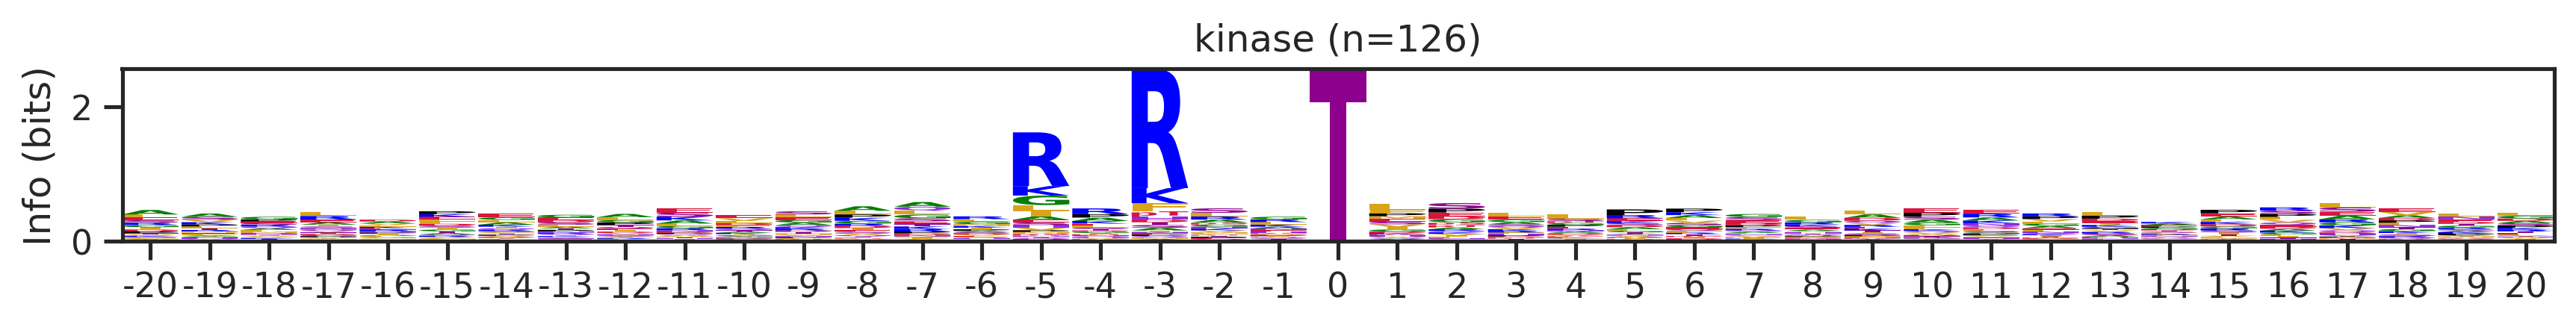

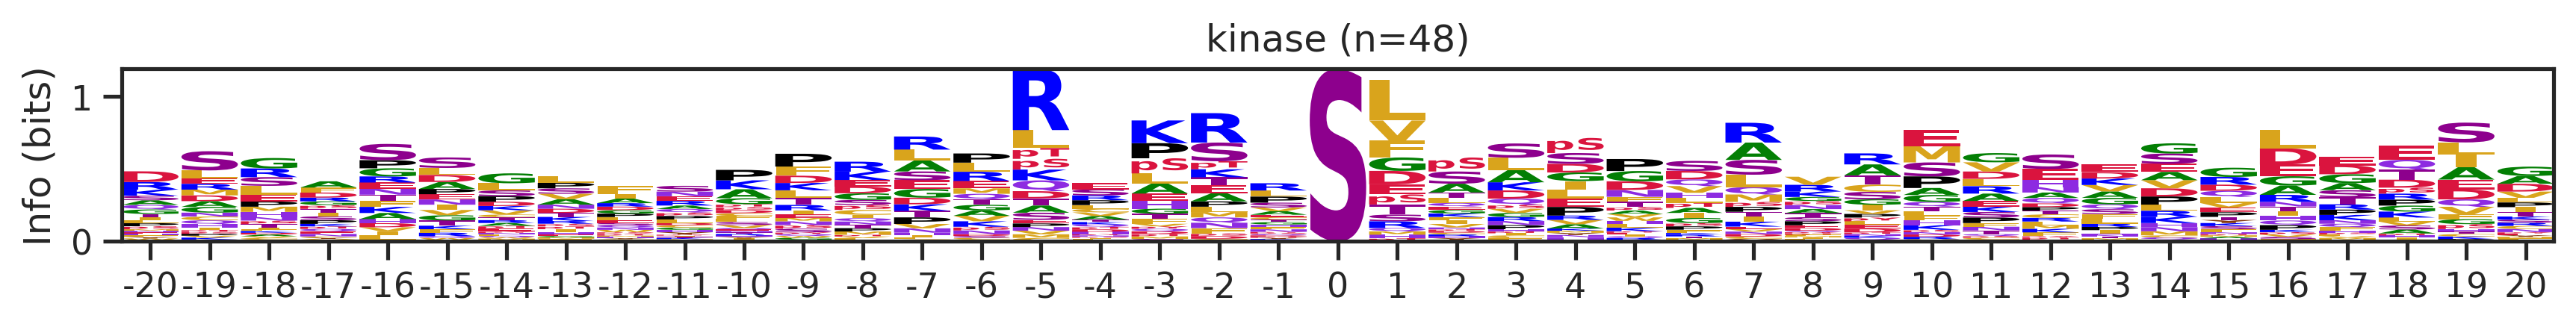

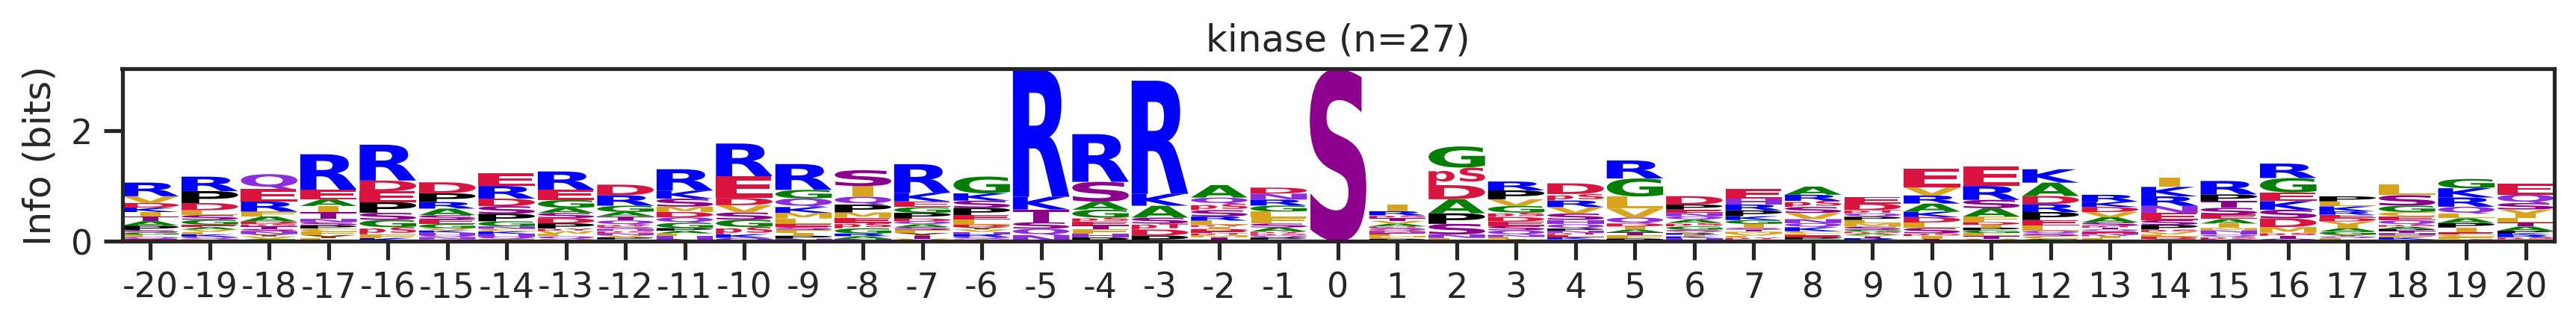

In [ ]:
for cluster_id,counts in df_k.kmeans_overall.value_counts().items():

    if counts>15:
        df_k_cluster = df_k[df_k.kmeans_overall==cluster_id]
        pssm = get_prob(df_k_cluster,'site_seq')
        if (pssm==0).sum().sum()/(pssm.shape[0]*pssm.shape[1])<0.5: # filter out low quality pssm
            # plot_logo_heatmap(pssm,title='kinase',figsize=(14,8))
            plot_logo(pssm,title=f'kinase (n={counts})',figsize=(14,1))
            plt.show()
            plt.close()

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(onehot_k)
df_k['cluster'] = cluster_labels

In [ ]:
cluster_counts = df_k.cluster.value_counts()
cluster_counts

cluster
9    523
5    414
1    399
4    113
8     76
7     76
6     44
2     25
0     16
3     16
Name: count, dtype: int64

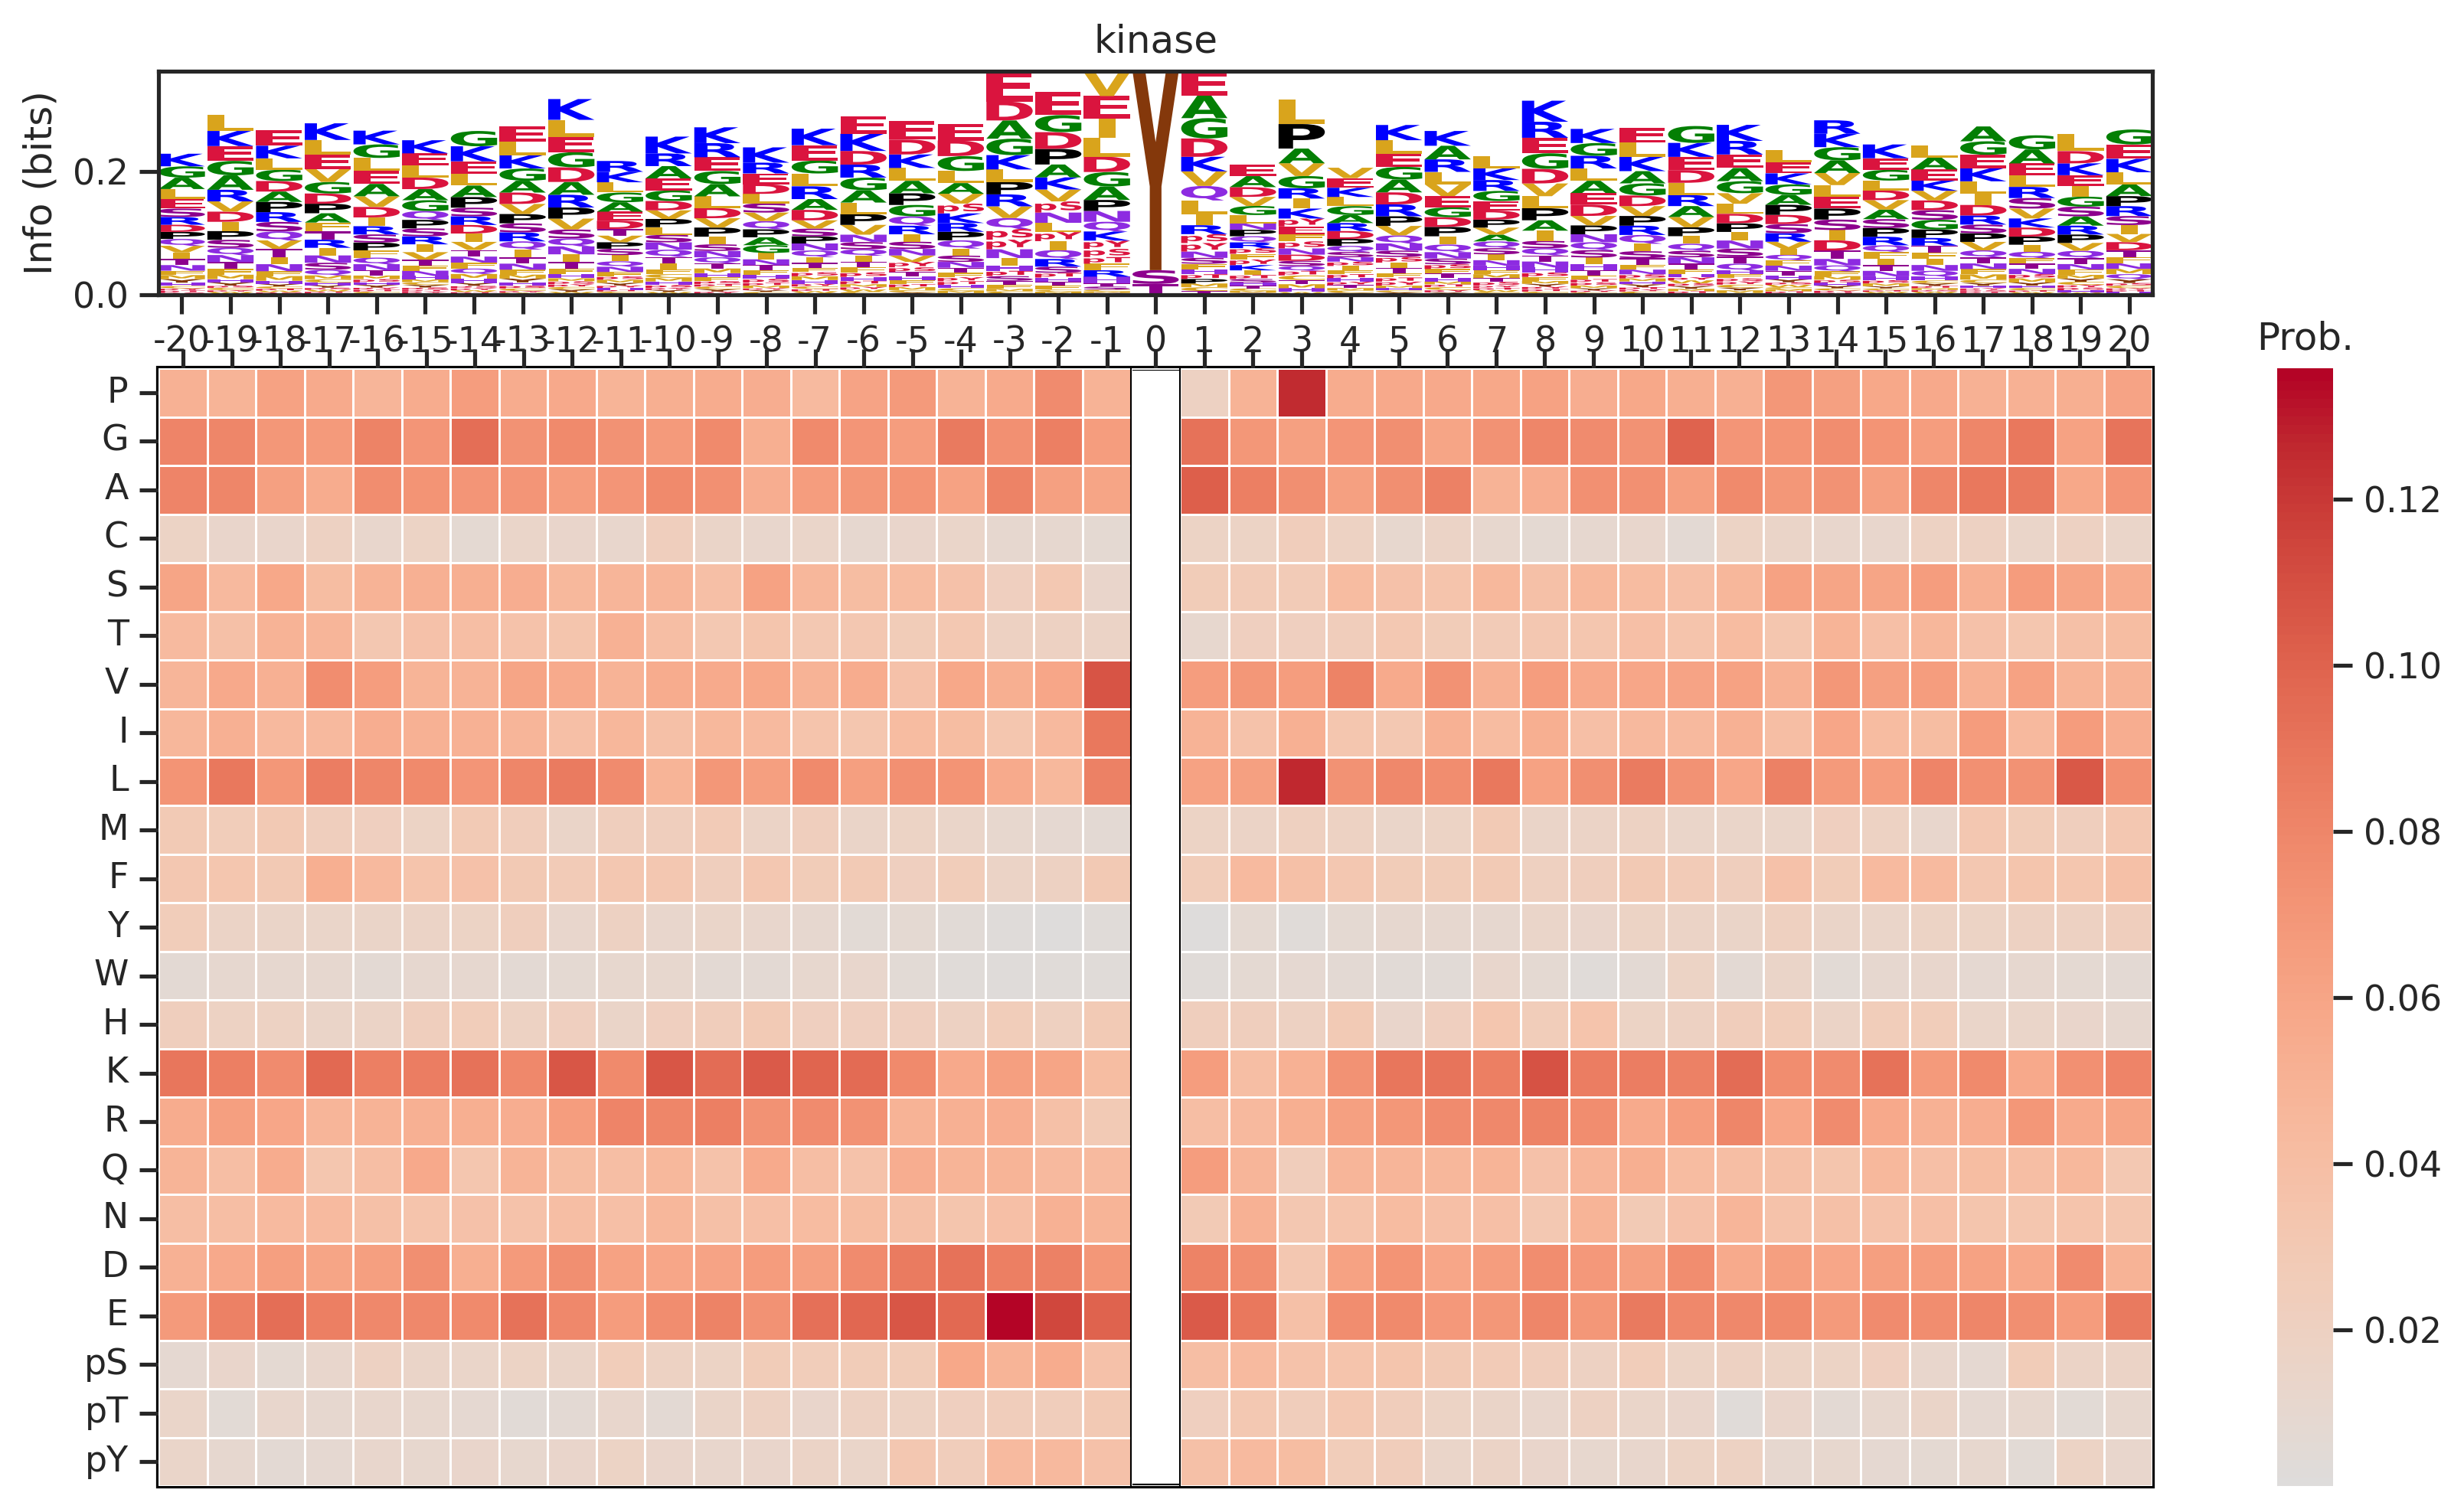

In [ ]:
pssm = get_prob(df_k,'site_seq')
plot_logo_heatmap(pssm,'kinase',figsize=(14,8))

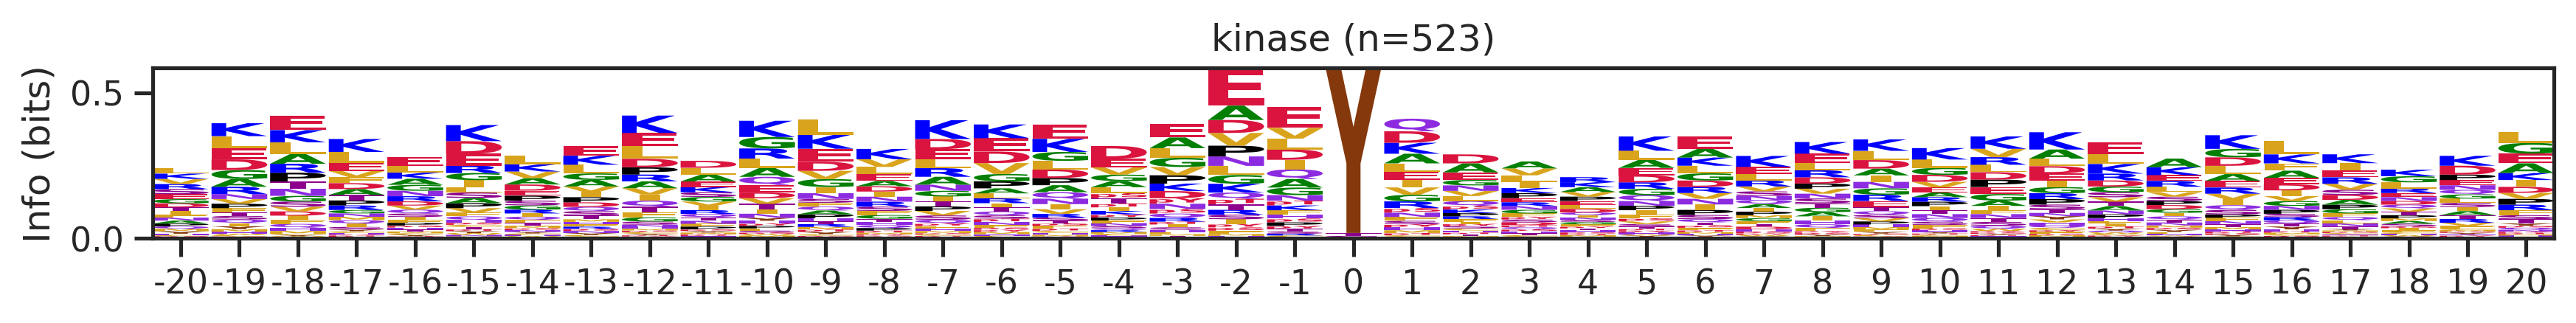

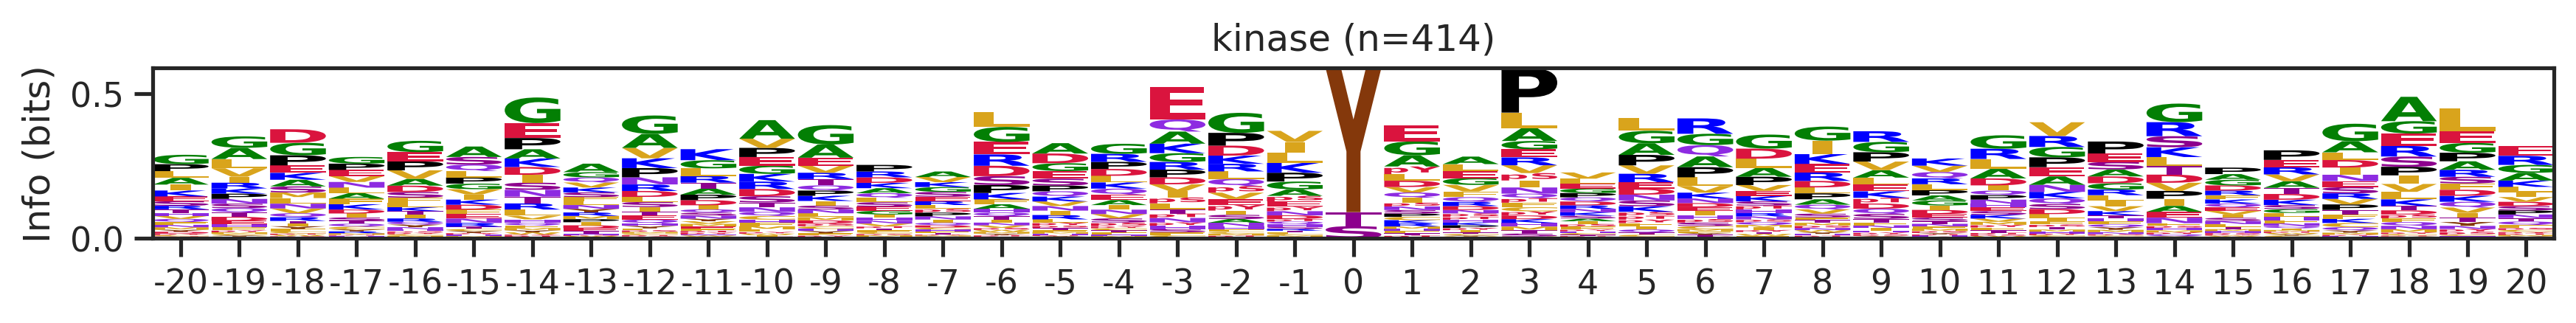

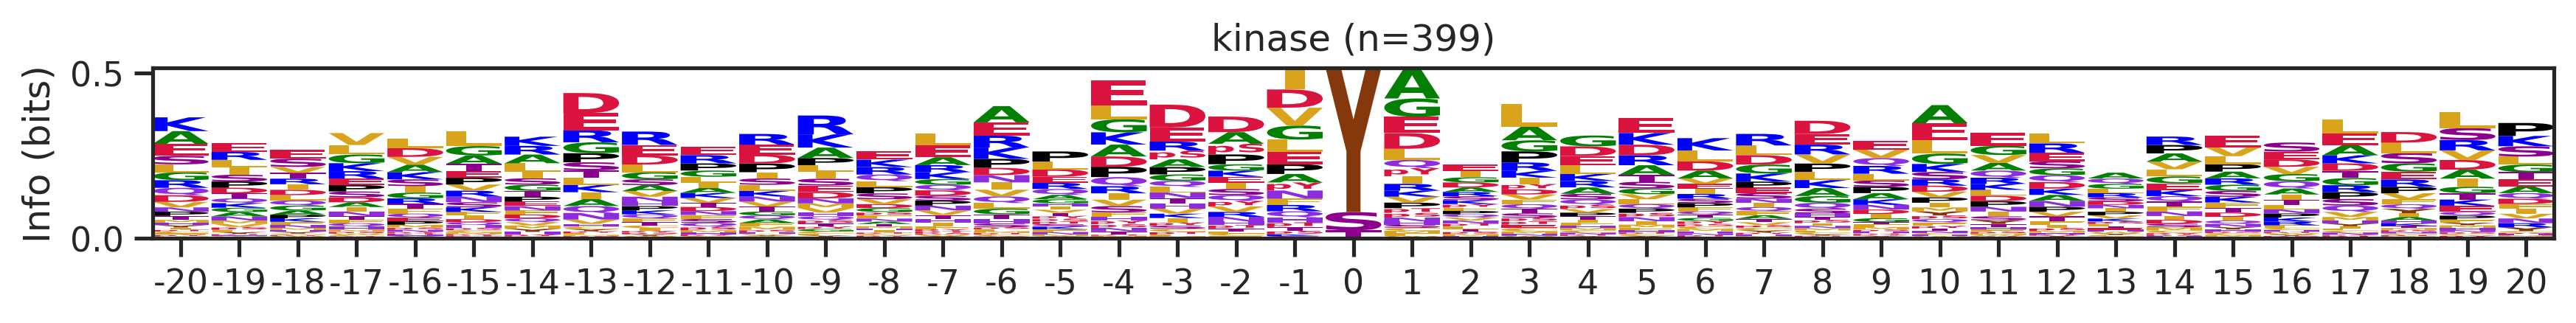

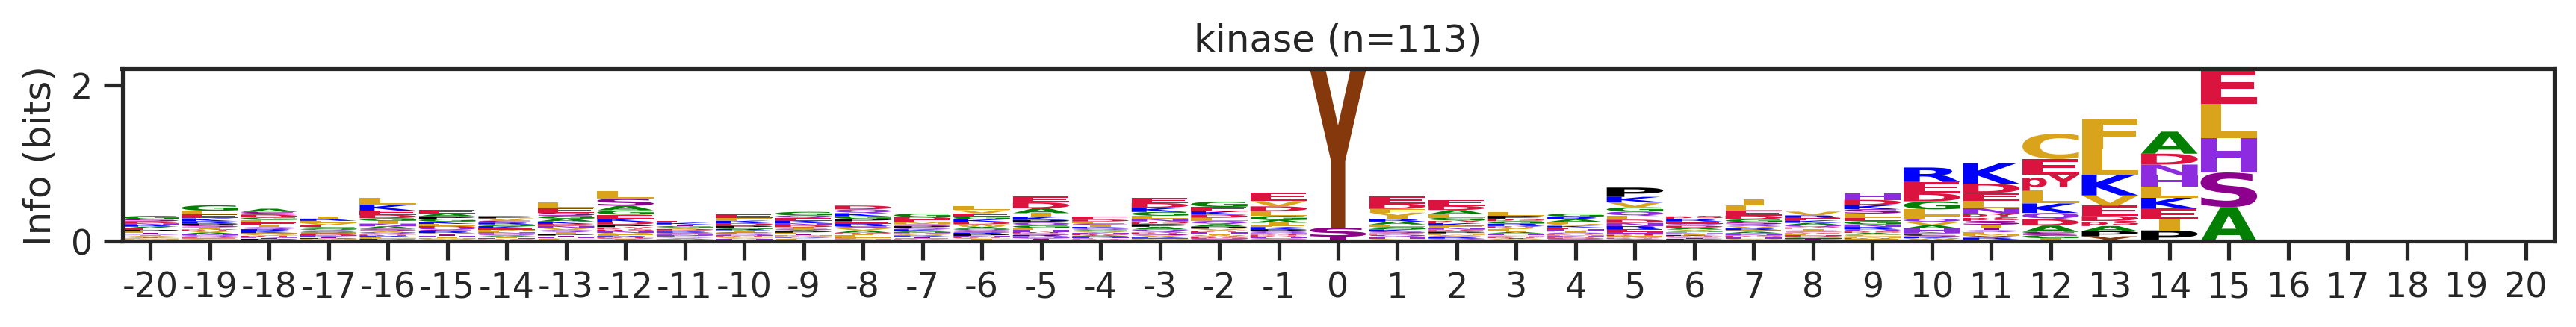

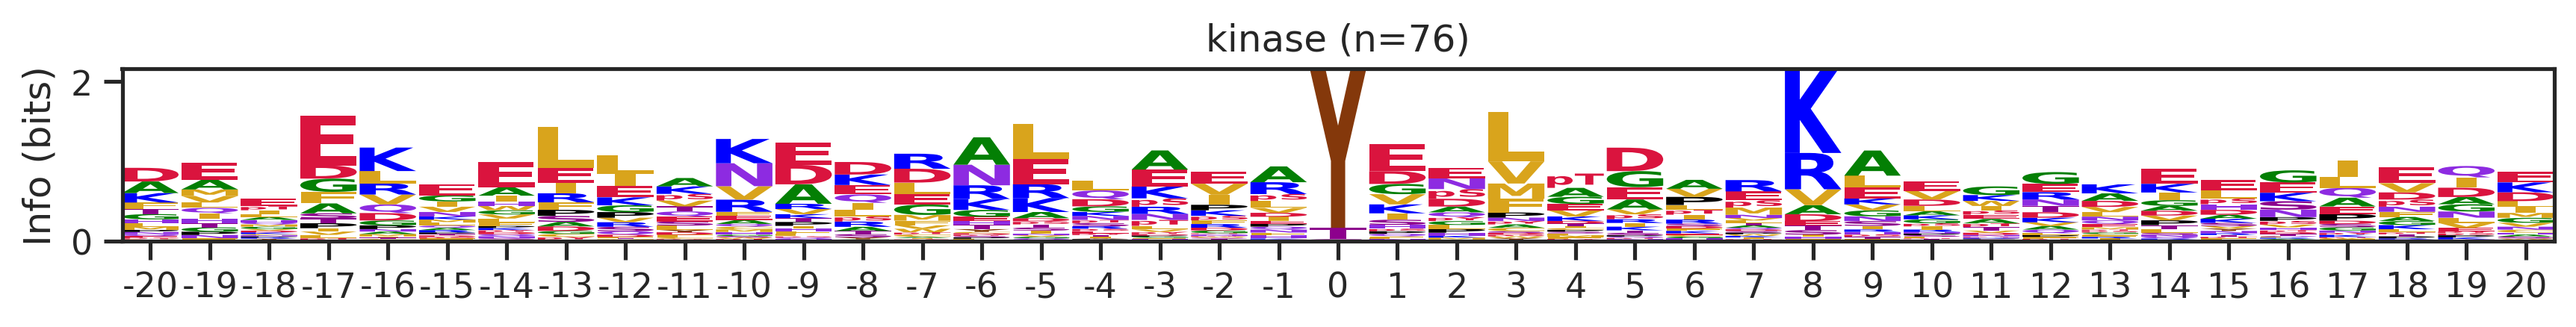

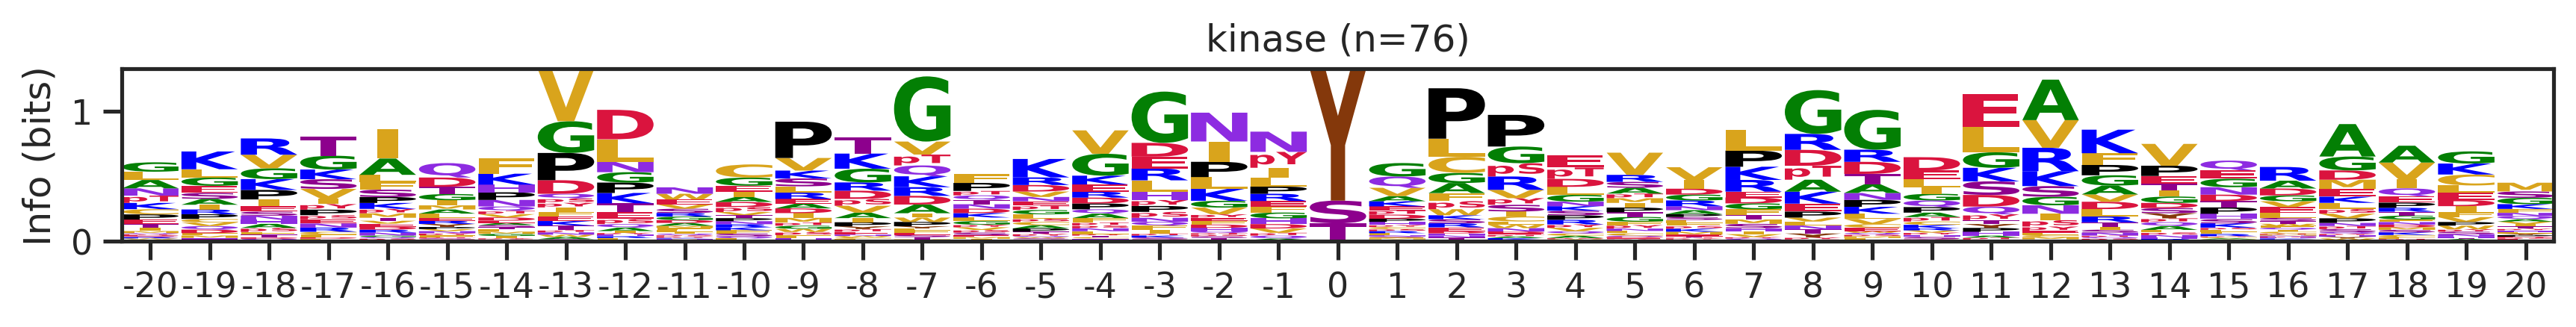

In [ ]:
for cluster_id,counts in df_k.cluster.value_counts().items():
    
    df_k_cluster = df_k[df_k.cluster==cluster_id]
    pssm = get_prob(df_k_cluster,'site_seq')
    if (pssm==0).sum().sum()/(pssm.shape[0]*pssm.shape[1])<0.4: # filter out low quality pssm
        # plot_logo_heatmap(pssm,title='kinase',figsize=(14,8))
        plot_logo(pssm,title=f'kinase (n={counts})',figsize=(14,1))
        plt.show()
        plt.close()
    # break